### 计算新闻传播学课程

***
***

# rpy2: Using R within Jupyter Notebook

***
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

> conda install rpy2

In [1]:
%load_ext rpy2.ipython 
# conda install rpy2

# Rpush: push Python object to R

In [57]:
import numpy as np
X = np.array([4.5,6.3,7.9, 10.3])
%Rpush X
%R mean(X)

array([ 7.25])

In [58]:
%%R
Y = c(2,4,3,9)
summary(lm(Y~X))


Call:
lm(formula = Y ~ X)

Residuals:
      1       2       3       4 
 0.5388  0.5498 -2.2183  1.1297 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   -3.511      3.265  -1.076    0.395
X              1.105      0.432   2.558    0.125

Residual standard error: 1.842 on 2 degrees of freedom
Multiple R-squared:  0.7659,	Adjusted R-squared:  0.6488 
F-statistic: 6.543 on 1 and 2 DF,  p-value: 0.1249



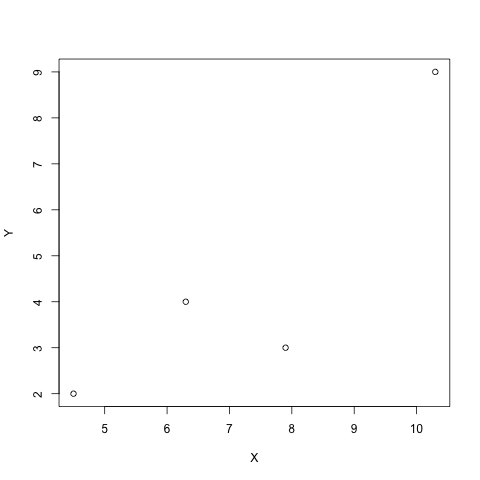

In [59]:
%R plot(X, Y)

In [60]:
%R dat = data.frame(X, Y)

,X,Y
1,4.5,2.0
2,6.3,4.0
3,7.9,3.0
4,10.3,9.0


# Rpull: pull data from R to python

https://rpy2.github.io/doc/latest/html/interactive.html?highlight=rpull#rpy2.ipython.rmagic.RMagics.Rpull

Not work for Python 3.X

In [90]:
%R x = c(3,4,6.7); y = c(4,6,7); z = c('a',3,4)

array(['a', '3', '4'], 
      dtype='<U1')

In [91]:
%R x

array([ 3. ,  4. ,  6.7])

In [95]:
x

<rpy2.rinterface.FloatSexpVector - Python:0x11f5209f0 / R:0x126328ed8>

In [66]:
%Rpull dat

In [67]:
dat

<rpy2.rinterface.ListSexpVector - Python:0x11f5205d0 / R:0x1263287c0>

In [17]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages
# import R's utility package
utils = rpackages.importr('utils') 

rpy2.rinterface.NULL

In [77]:
# select a mirror for R packages
utils.chooseCRANmirror() 

Secure CRAN mirrors
 





 1: 0-Cloud [https]                   2: Algeria [https]                
 3: Australia (Canberra) [https]      4: Australia (Melbourne 1) [https]
 5: Australia (Melbourne 2) [https]   6: Australia (Perth) [https]      
 7: Austria [https]                   8: Belgium (Ghent) [https]        
 9: Brazil (PR) [https]              10: Brazil (RJ) [https]            
11: Brazil (SP 1) [https]            12: Brazil (SP 2) [https]          
13: Bulgaria [https]                 14: Chile 1 [https]                
15: Chile 2 [https]                  16: China (Guangzhou) [https]      
17: China (Lanzhou) [https]          18: China (Shanghai) [https]       
19: Colombia (Cali) [https]          20: Czech Republic [https]         
21: Denmark [https]                  22: East Asia [https]              
23: Ecuador (Cuenca) [https]         24: Ecuador (Quito) [https]        
25: Estonia [https]                  26: France (Lyon 1) [https]        
27: France (Lyon 2) [htt

rpy2.rinterface.NULL

In [78]:
# R package names
packnames = ('ggplot2', 'hexbin')
# R vector of strings 
from rpy2.robjects.vectors import StrVector
# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = packnames 
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 还安装相依关系‘colorspace’, ‘munsell’, ‘viridisLite’, ‘MASS’, ‘scales’


  warnings.warn(x, RRuntimeWarning)
/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 试开URL’https://mirror.lzu.edu.cn/CRAN/src/contrib/colorspace_1.3-2.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Content type 'application/octet-stream'
  warnings.warn(x, RRuntimeWarning)
/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  length 293433 bytes (286 KB)

  warnings.warn(x, RRuntimeWarning)
/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/Users/datalab/Applications/ana

In [2]:
import rpy2.interactive as r
import rpy2.interactive.packages # this can take few seconds
r.packages.importr('ggplot2')

rpy2.robjects.packages.Package as a <module 'ggplot2'>

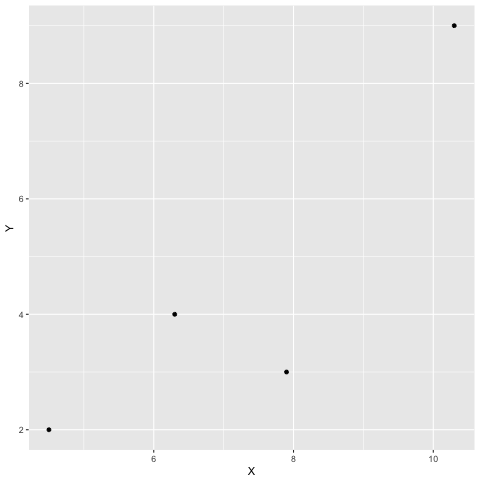

In [80]:
%%R 
p = ggplot(data = dat, mapping = aes(x = X, y =Y))
p + geom_point()

/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following object is masked from package:ggplot2:

    mpg


  warnings.warn(x, RRuntimeWarning)


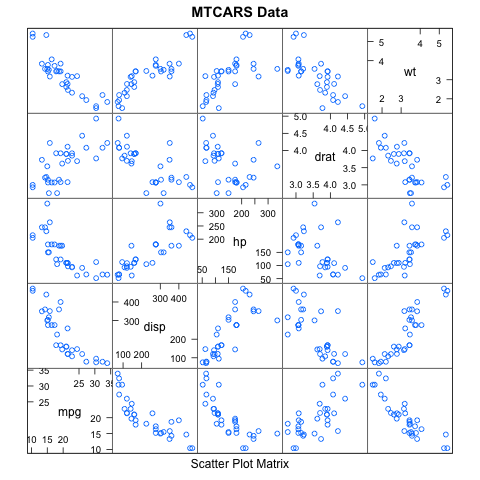

In [81]:
%%R
library(lattice)
attach(mtcars)

# scatterplot matrix
splom(mtcars[c(1,3,4,5,6)], main="MTCARS Data")

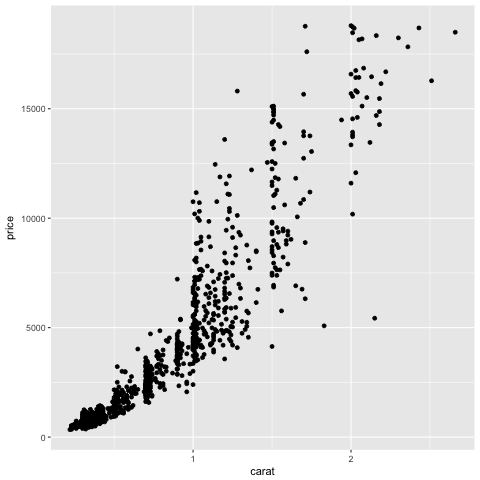

In [82]:
%%R
data(diamonds) 
set.seed(42) 
small = diamonds[sample(nrow(diamonds), 1000), ] 
head(small)

p = ggplot(data = small, mapping = aes(x = carat, y = price))
p + geom_point()

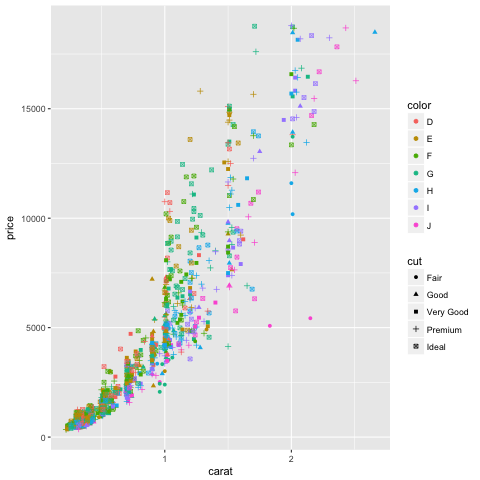

In [83]:
%%R 
p = ggplot(data=small, mapping=aes(x=carat, y=price, shape=cut, colour=color)) 
p+geom_point()

In [84]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

base = importr('base')

fit_full = ro.r("lm('mpg ~ wt + cyl', data=mtcars)")
print(base.summary(fit_full))


Call:
lm(formula = "mpg ~ wt + cyl", data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2893 -1.5512 -0.4684  1.5743  6.1004 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.6863     1.7150  23.141  < 2e-16 ***
wt           -3.1910     0.7569  -4.216 0.000222 ***
cyl          -1.5078     0.4147  -3.636 0.001064 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.568 on 29 degrees of freedom
Multiple R-squared:  0.8302,	Adjusted R-squared:  0.8185 
F-statistic: 70.91 on 2 and 29 DF,  p-value: 6.809e-12




In [85]:
diamonds = ro.r("data(diamonds)")

In [86]:
%R head(diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,3,7,6,62.8,57.0,336,3.94,3.96,2.48


In [87]:
fit_dia = ro.r("lm('price ~ carat + cut + color + clarity + depth', data=diamonds)")

In [88]:
print(base.summary(fit_dia))


Call:
lm(formula = "price ~ carat + cut + color + clarity + depth", 
    data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-16805.0   -680.3   -197.9    466.2  10393.4 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -3264.660    232.513  -14.041  < 2e-16 ***
carat        8885.816     12.034  738.362  < 2e-16 ***
cut.L         686.238     21.377   32.102  < 2e-16 ***
cut.Q        -319.729     18.383  -17.393  < 2e-16 ***
cut.C         180.446     15.556   11.600  < 2e-16 ***
cut^4           0.679     12.496    0.054   0.9567    
color.L     -1908.788     17.729 -107.667  < 2e-16 ***
color.Q      -627.976     16.121  -38.955  < 2e-16 ***
color.C      -172.431     15.072  -11.440  < 2e-16 ***
color^4        21.905     13.840    1.583   0.1135    
color^5       -85.781     13.076   -6.560 5.43e-11 ***
color^6       -50.112     11.889   -4.215 2.50e-05 ***
clarity.L    4214.426     30.873  136.508  < 2e-16 ***
clarity.Q   -1831.63

# END